In [1]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import t, norm, chi2, chi2_contingency

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

In [2]:
import math, scipy, sympy
from bs4 import BeautifulSoup as BS
import requests, re, urllib

from urllib import robotparser
from urllib.request import urlopen
import chardet

import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from time import sleep

In [3]:
url = "http://api.aoikujira.com/time/get.php"
html1 = requests.get(url)
html2 = html1.text
html3 = requests.get(url).content

bsa = BS(html2, 'html.parser')

print(html1)
print(html2)
print(html3)

<Response [200]>
2023/05/04 08:41:00
b'2023/05/04 08:41:00'


In [4]:
res = urllib.request.urlopen(url)
bsb = BS(res, 'html.parser')
print(res)
print(bsb)

2023/05/04 08:41:00


In [5]:
# urlencode파싱 + 일반 문자열로 합치기
url = 'http://www.naver.com'
values={'key1':'value1', 'key2':'value2'}
params = urllib.parse.urlencode(values)
url = url+'/?'+params
print(url)

# requests로 요청 시 데이터를 실어보내는 경우
# 데이터를 딕셔너리 형태로 만들어 보냄 (get 방식)
url = 'http://www.naver.com'
a = requests.get(url, params={'key1':'value1', 'key2':'value2'})
print(a.url)

# post요청 시 데이터가 url에 포함되지 않고 헤더의 바디에 포함됨
# body 데이터 추가시 data를 사용
url = 'http://www.naver.com'
b = requests.post(url, data={'key1':'value1', 'key2':'value2'})
print(b.url)

http://www.naver.com/?key1=value1&key2=value2
https://www.naver.com/?key1=value1&key2=value2
https://www.naver.com/


<!DOCTYPE html>
<html data-dark="false" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <title>
   NAVER
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=1190" name="viewport"/>
  <meta content="NAVER" name="apple-mobile-web-app-title">
   <meta content="index,nofollow" name="robots">
    <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
     <meta content="네이버" property="og:title"/>
     <meta content="https://www.naver.com/" property="og:url"/>
     <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
     <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
      <meta content="summary" name="twitter:card"/>
      <meta content="" name="twitter:title"/>
      <meta content="https://www.naver.com/" name="twitter:url"/>
      <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/
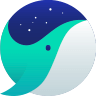
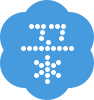

In [6]:
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
# 로봇이 아닌 사람임! 을 알리는 것 (브라우저에서 요청하는 정보구나~ 하고 열어줌)
req = requests.get(url, headers=headers)

bs = BS(req.content, 'html.parser')   #req.content 바이너리 정보/ req.text 텍스트 정보(느림)
print(bs.prettify())

In [7]:
# 기본 태그를 사용해서 해당하는 첫번째 텍스트와 전체 텍스트 출력
print(bs.find('div').text, '\n')

for i in bs.find_all('div'):
    a = ' '.join(re.findall('[^\n]+', i.text))
    if not i.issapce:
        print(a,'\n')

 뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기  

 뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기  

  매일 쓰는 브라우저 보안이 걱정된다면, 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요.다운로드 3일 동안 보지 않기 네이버 네이버를 시작페이지로 쥬니어네이버 해피빈 검색 검색 한글 입력기 자동완성 레이어 최근검색어 전체삭제 @txt@ @date@. 삭제 검색어 저장 기능이 꺼져 있습니다.설정이 초기화 된다면 도움말을 확인해주세요. 최근 검색어 내역이 없습니다.설정이 초기화 된다면 도움말을 확인해주세요. 도움말 자동저장 끄기 @5@회 로또당첨번호 동행복권 제공 @6@@7@@8@@9@@10@@11@@12@ @14@ @txt@@currency@ @8@(@9@%) @6@원 @txt@ @7@, @message@ @7@ @8@° @txt@ @5@ 바로가기 @txt@ 추가 @txt@ @date@. 추가 @query@ @intend@ 추가 자세히보기 관심사를 반영한 컨텍스트 자동완성도움말 컨텍스트 자동완성 컨텍스트 자동완성 ON/OFF 설정은해당기기(브라우저)에 저장됩니다. 자세히 동일한 시간대/연령/남녀별 사용자 그룹의관심사에 맞춰 자동완성을 제공합니다. 로그인 자세히 컨텍스트 자동완성 레이어 닫기 도움말 신고 자동완성 끄기 메일 카페 블로그 지식iN 쇼핑 쇼핑LIVE Pay TV 사전 뉴스 증권 부동산 지도 VIBE 도서 웹툰 더보기 서비스 전체보기 메뉴설정 초기화 저장 18.5°구름많음 15.0°26.0° 영등포동3가 미세보통 초미세보통 영등포동3가                뉴스스탠드   연합뉴스  美, 기준금리 0.25%P 또 올려…韓美 금리차 1.75%P로 '역대최대' 파월 "금리 동결, 아직 결정 안 됐다…금리 인하는 부적절" 기대가 과했나…뉴욕증시, 금리인하 선그은 파월 '입'에 하락 최대 한미 금리차에도…한은, 경기·금융 불안에 동결 가능성 법주

In [8]:
li = bs.find_all({'em','strong'})
for i in li[:20]:
    print(i.text)

안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요.
최근검색어
@date@.
@6@
@7@
@8@
@9@
@10@
@11@
@12@
@6@
@8@°
@date@.
컨텍스트 자동완성
동일한 시간대/연령/남녀별
18.5°
구름많음
보통
보통



In [9]:
bs.select_one('div#u_skip a span').text

'뉴스스탠드 바로가기'

In [10]:
te = bs.find_all('span', {"class":{"blind","tx"}})

for i in te:
    print(i.text, end=' / ')

네이버 / 쥬니어네이버 / 해피빈 / 검색 / 한글 입력기 / 자동완성 레이어 / 쇼핑 / 쇼핑LIVE / 리스트형 / 썸네일형 / 설정 / 이전 / 다음 / 닫기 / 닫기 / 이전 / 다음 / 닫기 / 닫기 / 이전 / 다음 / 다음 / 닫기 / 닫기 / 이전 / 다음 / 닫기 / 닫기 / 이전 / 다음 / 재생 / 재생 / 재생 / 재생 / 재생 / 재생 / 재생 / 재생 / 재생 / 위 / 상승 / 재생 / 가사 / 위 / 상승 / 재생 / 가사 / 위 / 상승 / 재생 / 가사 / 위 / 상승 / 재생 / 가사 / 위 / 상승 / 재생 / 가사 / 위 / 하락 / 재생 / 가사 / 위 / 상승 / 재생 / 가사 / 위 / 상승 / 재생 / 가사 / 위 / 재생 / 가사 / 위 / 상승 / 재생 / 가사 / 재생 / 재생 / 재생 / 재생 / 재생 / 재생 / 재생 / 재생 / 재생 / 이전 / 다음 / 재생 / 재생 / 재생 / 재생 / 재생 / 재생 / 재생 / 재생 / 재생 / NAVER / 이전 / 다음 / 보합 / 보합 / 상승 /    / TOP / 라이트 모드로 보기 / 

In [11]:
for i in bs.find_all('div'):
    print(' '.join(re.findall('\w+', i.text)))

뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기
매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 다운로드 3일 동안 보지 않기 네이버 네이버를 시작페이지로 쥬니어네이버 해피빈 검색 검색 한글 입력기 자동완성 레이어 최근검색어 전체삭제 txt date 삭제 검색어 저장 기능이 꺼져 있습니다 설정이 초기화 된다면 도움말을 확인해주세요 최근 검색어 내역이 없습니다 설정이 초기화 된다면 도움말을 확인해주세요 도움말 자동저장 끄기 5 회 로또당첨번호 동행복권 제공 6 7 8 9 10 11 12 14 txt currency 8 9 6 원 txt 7 message 7 8 txt 5 바로가기 txt 추가 txt date 추가 query intend 추가 자세히보기 관심사를 반영한 컨텍스트 자동완성도움말 컨텍스트 자동완성 컨텍스트 자동완성 ON OFF 설정은해당기기 브라우저 에 저장됩니다 자세히 동일한 시간대 연령 남녀별 사용자 그룹의관심사에 맞춰 자동완성을 제공합니다 로그인 자세히 컨텍스트 자동완성 레이어 닫기 도움말 신고 자동완성 끄기 메일 카페 블로그 지식iN 쇼핑 쇼핑LIVE Pay TV 사전 뉴스 증권 부동산 지도 VIBE 도서 웹툰 더보기 서비스 전체보기 메뉴설정 초기화 저장 18 5 구름많음 15 0 26 0 영등포동3가 미세보통 초미세보통 영등포동3가 뉴스스탠드 연합뉴스 美 기준금리 0 25 P 또 올려 韓美 금리차 1 75 P로 역대최대 파월 금리 동결 아직 결정 안 됐다 금리 인하는 부적절 기대가 과했나 뉴욕증시 금리인하 선그은 파월 입 에 하락 최대 한미 금리차에도 한은 경기 금융 불안에 동결 가능성 법주사 등 65개 사찰 오늘부터 무료입장 문화재관람료 면제 지난달 햄버거 물가상승률 17 1 19년만에 최고 러 우크라 드론이 푸틴 암살 시도 대대적 보복 위협 고령화 영향만으로 국민 1인당 연간 건보 추가부담액 눈덩이 구급차 뺑뺑이 후 숨진 10대 환자 외면한 대구 병원

In [12]:
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100'
a = requests.get(url, headers=headers).text
bs = BS(a, 'html.parser')

for i in bs.find_all(id=True):
    print('\n'.join(re.findall('[^\n]+', i.text)))

메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
언론사별 
정치 선택됨
경제 
사회 
생활/문화 
IT/과학 
세계 
랭킹 
신문보기 
오피니언 
TV 
팩트체크 
전체 언론사
뉴스스탠드
라이브러리
05.04(목)
전체 언론사
뉴스스탠드
라이브러리
기사목록
정치
대통령실 
국회/정당 
북한 
행정 
국방/외교 
정치일반 
안내헤드라인 뉴스
                            헤드라인 뉴스와 각 기사묶음 타이틀은  기사 내용을 기반으로 자동 추출됩니다.
                        
닫기
한덕수, 英찰스3세 국왕 대관식 참석...6박8일 '유럽4개국' 순방
한덕수 국무총리가 4일부터 11일까지 6박8일 일정으로 영국과 스웨덴, 오스트리아, 루마니아를 방문한다. 한 총리는 오는 6일(현지시간) 오전 우리 정부 …
머니투데이
연합뉴스
한총리, 6박8일 유럽 4개국 순방…英 찰스 3세 대관식 참석
머니S
한 총리, 英찰스 3세 대관식 참석… 4일 유럽 4개국 순방길 올라
뉴스1
한총리, 오늘 유럽 4개국 순방길 올라…英 찰스 3세 대관식 참석
5개의 관련뉴스 더보기
국토위 법안소위, '전세사기 특별법' 심사 재개
국회 국토교통위원회는 3일 국토법안심사소위원회를 열어 전세 사기 피해 지원을 위한 특별법 제정안 심사를 재개한다. 법안소위는 이날 오전 국민의힘 김정재  …
TV조선
이데일리
민주당 “전세사기 특별법 통과돼도 사각지대 구제 필요”
부산일보
전세사기 피해자들 울부짖는데… '지원 특별법' 난항
KBS
인천 미추홀구 전세피해 2,000억 원 추산…국토부 “전세사기 피해 대부분 지원”
64개의 관련뉴스 더보기
尹, ADB 연차총회서 "인태 경제·개발 협력 적극 기여하겠다"
윤석열 대통령은 3일 아시아개발은행(ADB) 연차총회 개회식에 참석해 "포용·신뢰·호혜의 3대 협력원칙을 바탕으로 인태 지역의 경제·개발 협력에 적극 기 …
한국일보
아시아경제
尹, 글로벌 경제 불안에 "국가 간 협력·연대 필

In [13]:
bs.find_all('a', tabindex='1')
bs.select_one('div#u_skip > a > span').text

# find 2중으로 쓸 수 있음
bs.find('div', id='header').find('a').text

'메인 메뉴로 바로가기'

In [14]:
for i in bs.find_all(class_='cluster_text')[:10]:
    print(' '.join(re.findall('[^\n]+',i.text)))

한덕수, 英찰스3세 국왕 대관식 참석...6박8일 '유럽4개국' 순방 한덕수 국무총리가 4일부터 11일까지 6박8일 일정으로 영국과 스웨덴, 오스트리아, 루마니아를 방문한다. 한 총리는 오는 6일(현지시간) 오전 우리 정부 … 머니투데이
연합뉴스 한총리, 6박8일 유럽 4개국 순방…英 찰스 3세 대관식 참석
머니S 한 총리, 英찰스 3세 대관식 참석… 4일 유럽 4개국 순방길 올라
뉴스1 한총리, 오늘 유럽 4개국 순방길 올라…英 찰스 3세 대관식 참석
국토위 법안소위, '전세사기 특별법' 심사 재개 국회 국토교통위원회는 3일 국토법안심사소위원회를 열어 전세 사기 피해 지원을 위한 특별법 제정안 심사를 재개한다. 법안소위는 이날 오전 국민의힘 김정재  … TV조선
이데일리 민주당 “전세사기 특별법 통과돼도 사각지대 구제 필요”
부산일보 전세사기 피해자들 울부짖는데… '지원 특별법' 난항
KBS 인천 미추홀구 전세피해 2,000억 원 추산…국토부 “전세사기 피해 대부분 지원”
尹, ADB 연차총회서 "인태 경제·개발 협력 적극 기여하겠다" 윤석열 대통령은 3일 아시아개발은행(ADB) 연차총회 개회식에 참석해 "포용·신뢰·호혜의 3대 협력원칙을 바탕으로 인태 지역의 경제·개발 협력에 적극 기 … 한국일보
아시아경제 尹, 글로벌 경제 불안에 "국가 간 협력·연대 필요"


In [15]:
url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100'

# BeautifulSoup로 가져오기 -> 최신 뉴스가 아님
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
a = requests.get(url, headers=headers).text
bs = BS(a, 'html.parser')

css = '#main_content > div > div._persist > div > div > div.cluster_body > ul > li > div.cluster_text > a'
for i in bs.select(css)[:5]:
    print(i.text)
print()

# 셀레니움으로 가져오기
path = r'C:\Users\h\hmkd1\chromedriver.exe'
driver = webdriver.Chrome(path)
driver.get(url)

news = driver.find_elements(By.CSS_SELECTOR, css)
for i in news[:5]:
    print(i.text.strip())

尹대통령 "한일 셔틀외교로 한일간 우호·협력 확대될 것"
기시다 메시지 전한 아키바… “尹 관계개선 결단에 보답하고자 답방”
尹대통령 “한일, 글로벌 복합위기 연대 대응해야”
韓日 안보실장 회담…경제안보대화 출범
민주당, 박광온 취임 후 첫 의총..."1박 2일 워크숍 통해 쇄신책 마련"

韓의원 독도 방문에…日 “독도는 명백한 일본 땅” 강력 항의
전용기, 청년위원회와 독도 방문…"日 독도 영유권 주장, 제2 주권침탈"
한일정상회담 앞두고 ‘독도 갈등’…전용기 “제주도 가도 반발?”
일본, 전용기 의원 독도 방문에…"매우 유감" 강한 항의
전현희, 감사원 전원위서 4시간 넘게 소명…최재해 원장도 참석(종합)


#### 과제(2): url에서 id가 footer인 한글만 출력

In [16]:
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100'
a = requests.get(url, headers=headers).text
bs = BS(a, 'html.parser')

for i in bs.find_all(id='footer'):
    print(' '.join(re.findall('[가-힣]+',i.text)))

이용약관 서비스 안내 기사배열 원칙 책임자 유봉석 청소년 보호 책임자 이희만 개인정보처리방침 책임의 한계와 법적고지 뉴스 고객센터 본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다


#### 과제(3): url에서 p태그가 있는 데이터를  출력

In [17]:
for i in bs.findAll('p'):
    print('\n'.join(re.findall('[^\n]+',i.text)), '\n')

AiRS추천으로 구성된 뉴스를 제공합니다. 

오전 7시~오전 8시까지 집계한 결과입니다. 

본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다. 



#### 과제(4): url에서 '정치' 출력

In [18]:
url = 'https://news.daum.net/politics'
driver = webdriver.Chrome(path)
driver.get(url)

# 방법1
print(driver.find_element(By.PARTIAL_LINK_TEXT, '정치').text)
    
# 방법2
path = '//*[@id="gnbContent"]/div/ul/li[3]/a/span'
print(driver.find_element(By.XPATH, path).text)

# 방법3
css = '#gnbContent > div > ul > li.on > a > span'
print(driver.find_element(By.CSS_SELECTOR, css).text)

driver.close()

정치
정치
정치


#### 과제(5): 사이트에서 뉴스 제목 10개 가져오기
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100%27%EC%97%90%EC%84%9C'

#### 과제(6): 위에서 출력한 데이터 news.txt 파일로 저장

In [19]:
url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100'

# BeautifulSoup로 가져오기 -> 최신 뉴스가 아님
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
a = requests.get(url, headers=headers).text
bs = BS(a, 'html.parser')

css = '#main_content > div > div._persist > div > div > div.cluster_body > ul > li > div.cluster_text > a'
for i in bs.select(css)[:10]:
    print(i.text)
print()

# 셀레니움으로 가져오기
driver = webdriver.Chrome(path)
driver.get(url)

news = driver.find_elements(By.CSS_SELECTOR, css)
a = '\n'.join([i.text.strip() for i in news[:10]])
print(a)

driver.close()

# 파일에 저장
with open('news.txt','w') as f:
    f.write(a)

국토위 법안소위, '전세사기 특별법' 심사 재개
국토위 법안소위 '전세사기 대책특별법' 합의 또 불발
인천 미추홀구 전세피해 2,000억 원 추산…국토부 “전세사기 피해 대부분 지원”
국회 국토교통위, 오늘 전세 사기 피해지원 특별법 심사 재개
태영호 '녹취' 파장…당무 개입 논란에 당 안팎 비판[정다운의 뉴스톡]
코너에 몰린 태영호…'보좌진 회의 유출'부터 '4·3 발언'까지
'녹취록 파문' 태영호-이진복 모두 "사실 아냐"...징계 수위 영향?
'태영호 녹취' 여파…여, 진화 노력 속 내부 비판도
‘윤관석·이성만 탈당’ 질문에 이재명 “태영호 사건은요?”
‘돈봉투 의혹’ 윤관석·이성만 “명예 되찾아 당으로 돌아오겠다”

‘국힘’ 윤리위, 태영호 징계절차 개시… 녹취 유출 등 사유 3가지
與윤리위, ‘태영호 녹취록’ 징계 착수…내일 최고위는 취소
김기현 “태영호 관련 일련 사건들, 윤리위에 병합 판단 요청”
태영호, 이번엔 쪼개기 후원금 의혹…김기현 “단호히 대처”
'3시간 의총' 野 난상토론…"돈봉투 사건 절박하게 다뤄야"
민주당, 박광온 취임 후 첫 의총..."1박 2일 워크숍 통해 쇄신책 마련"
민주, '돈봉투' 탈당 속 3시간 난상토론…"이번 사건 끝났다 생각 않는다"
"당 근본부터 정치까지 쇄신 추진"…박광온 민주당 개혁 청사진 내놨다
'독도 방문' 野 의원 "日 외무성 항의? 명백한 주권 침탈이자 내정간섭"
日, 전용기 의원 독도 방문에 “매우 유감…강력 항의”


#### 과제(7): 네이버 등 자주 사용하는 웹페이지에서 가치있다고 생각할 수 있는 데이터를 가져와서 활용할 수 있는 형태로 출력하세요.(최소 1000개 이상)

In [44]:
url = 'https://m.stock.naver.com/domestic/index/KOSPI/total'  # 코스피 주가 데이터
driver = webdriver.Chrome(path)
driver.get(url)

path='//*[@id="header"]/div[1]/div/div[1]/div[1]/h1/a[2]/strong'
driver.find_element(By.XPATH, path).click()   # 구성종목 더보기

for i in range(3):
    sleep(1)
    driver.execute_script("window.scrollTo(0, 10000)")   #스크롤 내리기

path='//*[@id="_domestic_home_tab"]/div[3]/div[2]/a'
try: 
    for i in range(200):
        sleep(0.1)
        driver.find_element(By.XPATH, path).click()   #더보기 버튼 클릭
except: pass   #더이상 버튼이 없으면 

path='//*[@id="content"]/div[3]'
data = driver.find_elements(By.XPATH, path)   #코스피 증시 정보

for i in data:
    try: cdata = i.text
    except StaleElementReferenceException: pass   #오류 처리

with open('cdata.txt', 'w') as f:
    text = '<국내 코스피 증시(/시가총액순)>\n\n'
    kdata = re.findall('\n([가-힣a-zA-Z].+)\n[0-9,]+\n(.+)\n.+\n.+\n(.+%)\n',cdata)
    for i in kdata:
        text = text+i[0]+' : '+i[1]+' ('+ i[2] +')'+'\n'
    f.write(text)
    
with open('cdata.txt', 'r') as f:
    print(f.read())
    
# driver.close()

<국내 코스피 증시(/시가총액순)>

삼성전자 : 65,300 (-0.15%)
LG에너지솔루션 : 569,000 (+0.35%)
SK하이닉스 : 88,900 (-1.00%)
삼성바이오로직스 : 786,000 (+1.42%)
LG화학 : 730,000 (+0.55%)
삼성SDI : 691,000 (+1.02%)
삼성전자우 : 55,000 (-0.54%)
현대차 : 199,500 (-0.75%)
POSCO홀딩스 : 379,000 (-0.26%)
NAVER : 190,400 (-1.14%)
포스코퓨처엠 : 346,500 (+0.43%)
카카오 : 56,600 (-2.92%)
셀트리온 : 161,900 (+1.82%)
현대모비스 : 219,500 (-0.68%)
삼성물산 : 110,100 (+0.36%)
KB금융 : 48,000 (-0.62%)
LG전자 : 109,700 (+0.37%)
신한지주 : 34,800 (-0.14%)
SK이노베이션 : 181,800 (+3.41%)
LG : 89,100 (+0.56%)
삼성생명 : 67,000 (-0.30%)
한국전력 : 19,040 (+1.12%)
하나금융지주 : 41,400 (-0.36%)
하이브 : 288,000 (-2.21%)
SK : 163,800 (-0.06%)
KT&G : 85,800 (-0.46%)
카카오뱅크 : 23,200 (-3.73%)
삼성화재 : 226,500 (-0.22%)
삼성전기 : 141,800 (-1.05%)
SK텔레콤 : 47,750 (-0.31%)
두산에너빌리티 : 15,880 (+1.99%)
고려아연 : 509,000 (-0.59%)
HMM : 20,150 (+0.80%)
HD현대중공업 : 109,800 (+0.46%)
메리츠금융지주 : 46,000 (+0.44%)
크래프톤 : 192,600 (-0.16%)
삼성에스디에스 : 118,200 (+0.08%)
LG생활건강 : 580,000 (-1.02%)
우리금융지주 : 11,550 (-0.09%)
엔씨소프트 : 382,500 (-2.55%)


In [45]:
len(text.split('\n'))

1603

In [41]:
cdata = cdata.split('\n')
for i in range(len(cdata)):
    print(i,':',cdata[i])

0 : 시가총액
1 : 상승
2 : 하락
3 : 52주 최고
4 : 52주 최저
5 : 거래상위
6 : 인기검색
7 : 업종
8 : 테마
9 : 배당
10 : 신규상장
11 : 관리
12 : IPO
13 : ETF
14 : ETN
15 : 코넥스
16 : 코스피
17 : 코스닥
18 : 종목명, 현재가, 등락률, 시가총액(억), 거래량 표
19 : 삼성전자
20 : 005930
21 : 65,200
22 : 200
23 : 200
24 : -0.31%
25 : LG에너지솔루션
26 : 373220
27 : 564,000
28 : 3,000
29 : 3,000
30 : -0.53%
31 : SK하이닉스
32 : 000660
33 : 89,100
34 : 700
35 : 700
36 : -0.78%
37 : 삼성바이오로직스
38 : 207940
39 : 785,000
40 : 10,000
41 : 10,000
42 : +1.29%
43 : LG화학
44 : 051910
45 : 728,000
46 : 2,000
47 : 2,000
48 : +0.28%
49 : 삼성SDI
50 : 006400
51 : 688,000
52 : 4,000
53 : 4,000
54 : +0.58%
55 : 삼성전자우
56 : 005935
57 : 54,900
58 : 400
59 : 400
60 : -0.72%
61 : 현대차
62 : 005380
63 : 199,200
64 : 1,800
65 : 1,800
66 : -0.90%
67 : 기아
68 : 000270
69 : 86,400
70 : 100
71 : 100
72 : -0.12%
73 : POSCO홀딩스
74 : 005490
75 : 378,000
76 : 2,000
77 : 2,000
78 : -0.53%
79 : NAVER
80 : 035420
81 : 190,700
82 : 1,900
83 : 1,900
84 : -0.99%
85 : 포스코퓨처엠
86 : 003670
87 : 345,500
88 : 500
89 : 500